# Лабораторная работа №1
## Численные методы решения задачи Коши: законы Кеплера

Написать программу, решающую задачу Коши для уравнения движения планеты в поле тяготения звезды. 
Звезду считать неподвижной, зафиксированной в начале координат.
Размером планеры пренебречь, считать планету материальной точкой.

Ограничиться двумерным случаем: радиус-вектор и скорость считать лежащими в плоскости z=0.

1. Для решения дифференциального уравнения использовать явный метод Эйлера.
Проверить замкнутость получающихся орбит. Проверить выполнение законов сохранения энергии и момента импульса (т.е. второго закона Кеплера)
Исследовать зависимость результатов от выбора шага численного интегрирования.

2. Повторить предыдущий пункт, используя, на выбор, либо неявный метод Эйлера, либо метод Рунге-Кутты второго порядка точности.
Сравнить результаты работы выбранного метода с работой явного метода Эйлера.

Критерии оценивания:
- наличие и ясность описания теоретической части
- правильность и ясность реализации вычислительных методов
- графическое представление результатов
- выводы, обсуждение результатов
- (высшие баллы) исследование поведения выбранных методов интегрирования ОДУ.

<div style="text-align: right"> *Надо верить, что ты на что-то годен, и этого "что-то" нужно достигнуть во что бы то ни стало* </div> <div style="text-align: right"> ***— М. Склодовская-Кюри*** </div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

%matplotlib inline

Classical Cauchy problem describing Keplerian motion:
$$\ddot{r} = -\frac{\mu}{r^3}r, \; r(0) = r_0,\; \dot{r} = v_0$$
$$\frac{d^2x}{dt^2} = -\frac{GM}{r^3}x$$
$$\frac{d^2y}{dt^2} = -\frac{GM}{r^3}y$$

***Wiki***:
For elliptical orbits, applying Kepler's 3rd law, expressed in units characteristic of Earth's orbit:
$$ G=4\pi ^{2}{\rm {\ AU^{3}}}{\rm {\ yr^{-2}}}\ M^{-1}\approx 39.478{\rm {\ AU^{3}}}{\rm {\ yr^{-2}}}\ M_{\odot }^{-1}\,,$$
where distance is measured in terms of the semi-major axis of Earth's orbit (the astronomical unit, AU), time in years, and mass in the total mass of the orbiting system ($M = M_☉+M_⊕+M_☾$).

***Angular momentum:*** $$ \boldsymbol{L} = \boldsymbol{r} \times \boldsymbol{v} $$

In [3]:
"""Define constants"""
G = 4*np.pi**2 # Newtonian gravitational constant
M  = 1.0 # mass of the central mass

In [4]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
velocity = 0.211 * np.array([47.36, 35.02, 29.78, 24.07, 13.06, 9.68, 6.80, 5.43])  # AU per year
distance = np.array([0.387, 0.723, 1, 1.523, 5.203, 9.537, 19.191, 30.069]) # AU
periods = np.array([0.241, 0.615, 1, 1.88, 11.863, 29.447, 84.017, 164.791]) 

In [5]:
f = lambda r, v : -G*M*r/(np.linalg.norm(r)**3)

In [6]:
def euler(x0, vy0, tf, tau, y0=0, vx0=0, t0=0):
    r_old = np.array([x0, y0])
    v = np.array([vx0, vy0])
    t = t0 # set starting time to 0
    
    ## Create arrays needed to store the results for plotting
    r_plt = np.array([r_old])
    v_plt = np.array([v])
    t_plt = np.array([t0])

    while (t < tf):       # implement Euler step
        r = r_old + v*tau
        v = v + tau*f(r,v)
        # Append new points to the arrays
        r_plt = np.vstack((r_plt, r))
        v_plt = np.vstack((v_plt, v))
        t_plt = np.append(t_plt, t)
        # Update x_old and y_old for next Euler step
        r_old = r
        t = t + tau # Increment time
        
    return r_plt, v_plt, t_plt

In [7]:
def rungekutta_2(tf, tau, x0=1, y0=0, vx0=0, vy0=velocity[2], f=f, t0=0):
    n = int(np.round((tf-t0)/tau))
    
    r=np.array([x0, y0])
    v=np.array([vx0, vy0])
    
    r_plt = np.array([r])
    v_plt = np.array([v])
    t_plt = np.array([t0])
    t = t0
    
    for i in range(n):
        v1 = v + tau*f(r+tau/2, v+tau/2*f(r, v))
        
        r_plt = np.vstack((r_plt, r))
        v_plt = np.vstack((v_plt, v))
        t_plt = np.append(t_plt, t)
        
        r = r + tau*v 
        v = v1
        t = t + tau
    print(n)
        
    return r_plt, v_plt, t_plt

In [8]:
colormap = plt.get_cmap("tab20").colors[:len(names)]

In [9]:
def plot_trajectory(x0, vy0, tf, tau, method, name, f=f, color="tab:blue"):
    print("For circular orbit of r = {0}, and v = {1}; {2}".format(x0, vy0, name)) 

    r_plt, v_plt, t_plt = method(x0=x0, vy0=vy0, tf=tf, tau=tau, f=f)

    ## Plot the results
    fig = plt.figure(figsize=(10, 10)) 
    plt.subplot(2,1,1)
    plt.title(r'$x$ = {0}, $v_y$ = {1} and $\tau$ = {2}'.format(x0, vy0, tau))
    plt.plot(r_plt[:, 0], r_plt[:, 1], color=color)
    center_x, center_y = 0, 0
    plt.scatter(center_x, center_y)
    plt.axis('equal')   # make axis scales equal so circular orbits look circular

    ## Plot the energy
    plt.subplot(2, 1, 2)
    eps = [0.5*(v_[0]**2 + v_[1]**2) - G*M/np.sqrt(r_[0]**2 + r_[1]**2) for v_, r_ in zip(v_plt, r_plt)]
    plt.plot(t_plt, eps, color=color)
    eps_plot_min = 1.1*min(eps)
    plt.axis([min(t_plt), max(t_plt), eps_plot_min, 0])
    plt.xlabel('t')
    plt.ylabel('E/m')
    plt.show()
    
    # plot momentum
    plt.subplot(2, 1, 2)
    #r = np.stack((x_plt, y_plt), axis=1)
    #v = np.stack((vx_plt, vy_plt), axis=1)
    avelocity = [np.cross(r_i, v_i)/2 for r_i, v_i in zip(r_plt, v_plt)]
    plt.plot(t_plt, avelocity, color=color)
    av_plot_min = 1.1*min(avelocity)
    plt.axis([min(t_plt), max(t_plt), av_plot_min, 0])
    plt.xlabel('t')
    plt.ylabel('L/m') # L is for angular momentum
    plt.show()

## Euler on circular orbits with different $\tau$-s

For circular orbit of r = 0.387, and v = 9.99296; Mercury


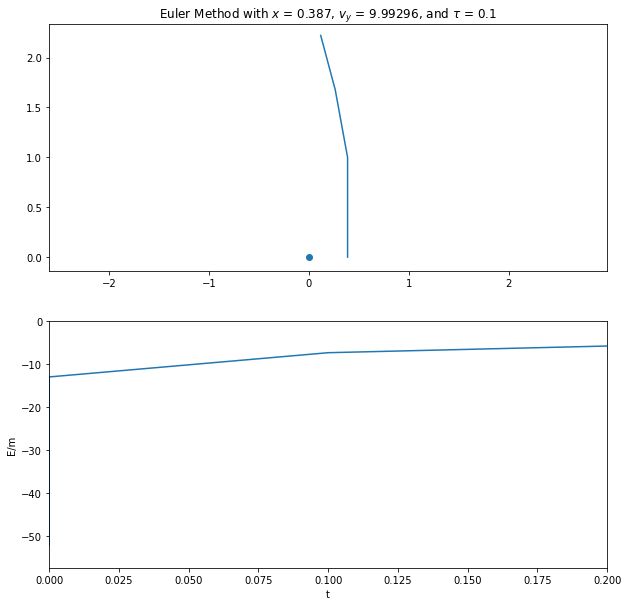

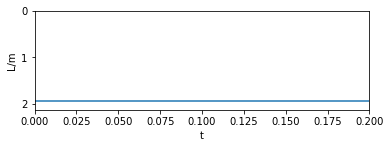

Wall time: 476 ms
For circular orbit of r = 0.723, and v = 7.389220000000001; Venus


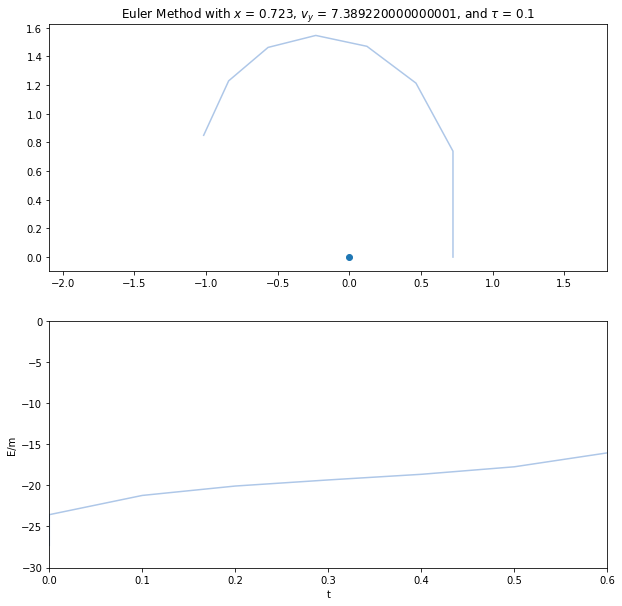

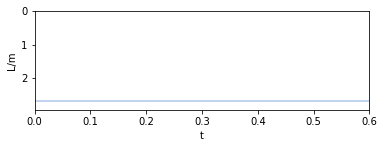

Wall time: 543 ms
For circular orbit of r = 1.0, and v = 6.28358; Earth


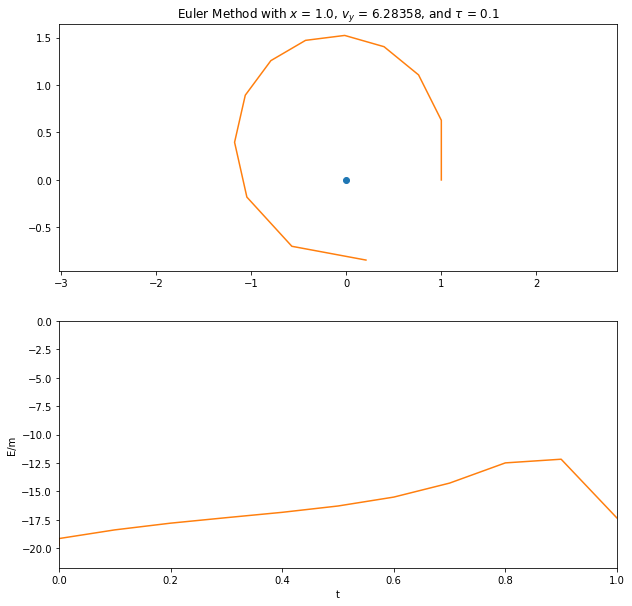

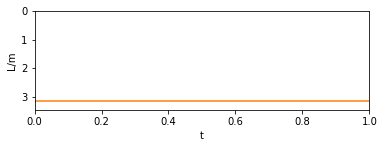

Wall time: 500 ms
For circular orbit of r = 1.523, and v = 5.07877; Mars


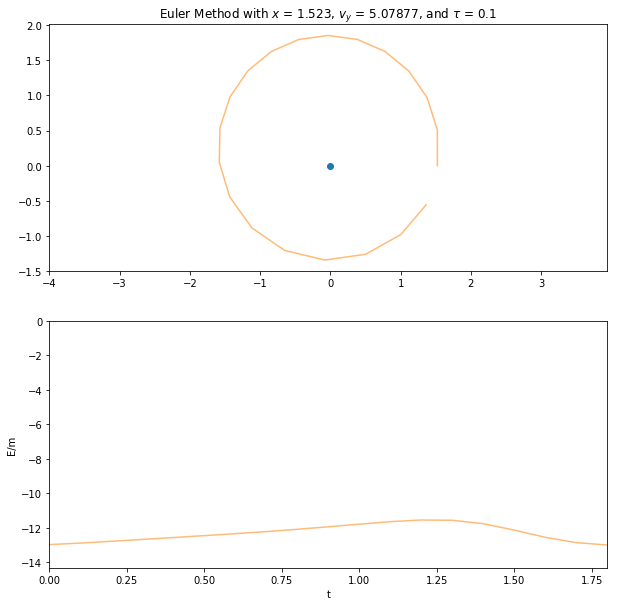

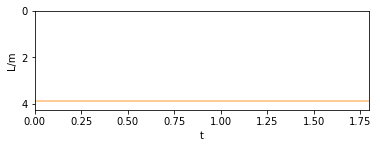

Wall time: 683 ms
For circular orbit of r = 5.203, and v = 2.75566; Jupiter


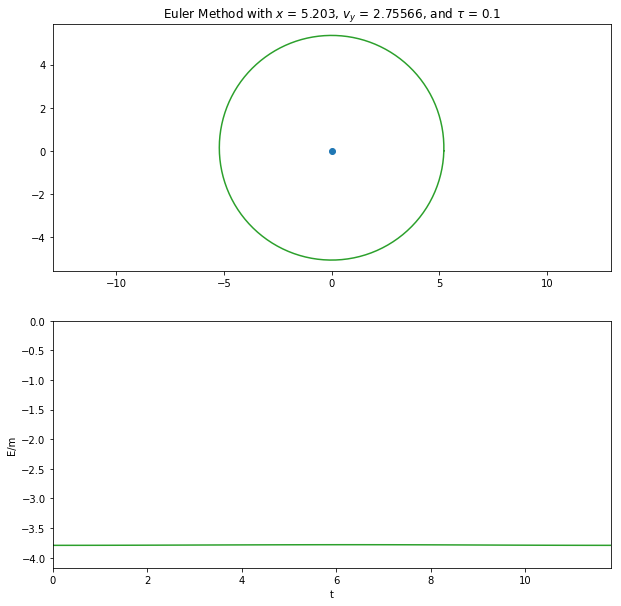

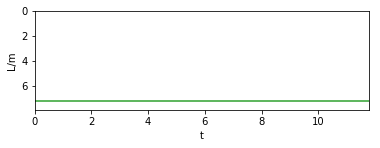

Wall time: 574 ms
For circular orbit of r = 9.537, and v = 2.04248; Saturn


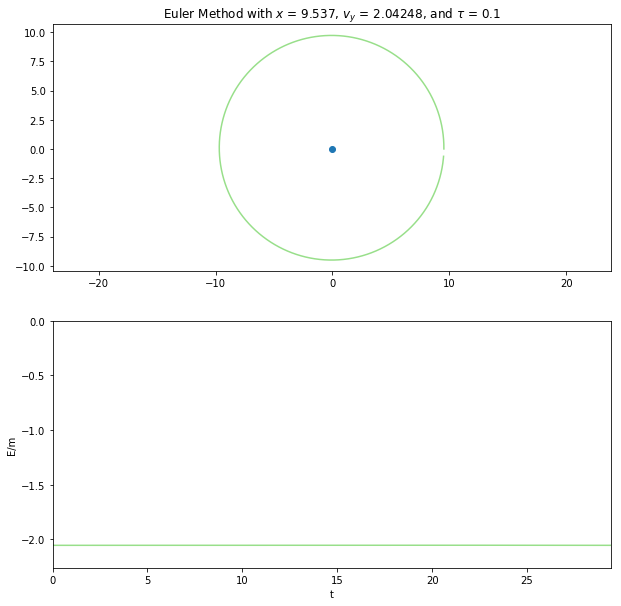

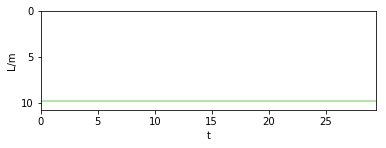

Wall time: 613 ms
For circular orbit of r = 19.191, and v = 1.4347999999999999; Uranus


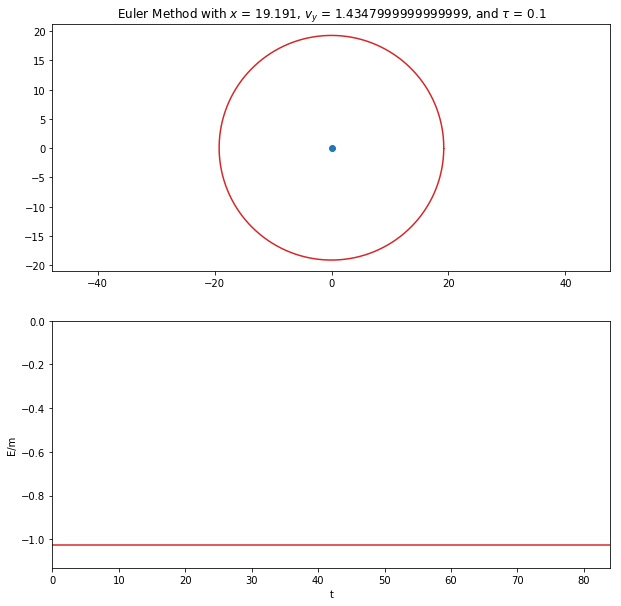

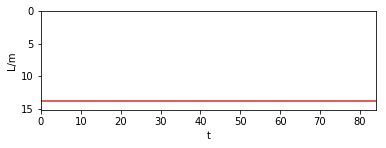

Wall time: 630 ms
For circular orbit of r = 30.069, and v = 1.14573; Neptune


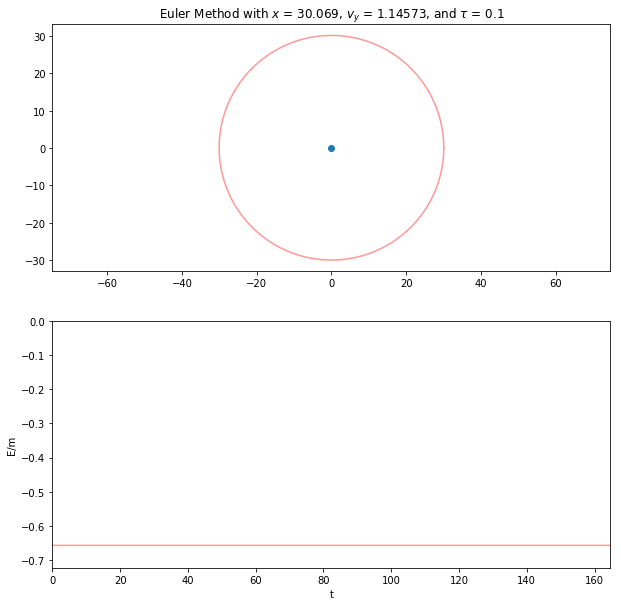

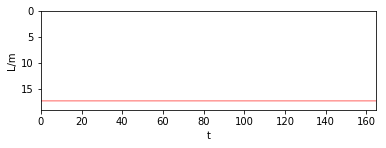

Wall time: 720 ms


In [173]:
for x0, vy0, tf, color, name in zip(distance, velocity, periods, colormap, names):
    %time plot_trajectory(x0=x0, vy0=vy0, tf=tf, tau=0.1, method=euler, name=name, color=color)

For circular orbit of r = 0.387, and v = 9.99296; Mercury


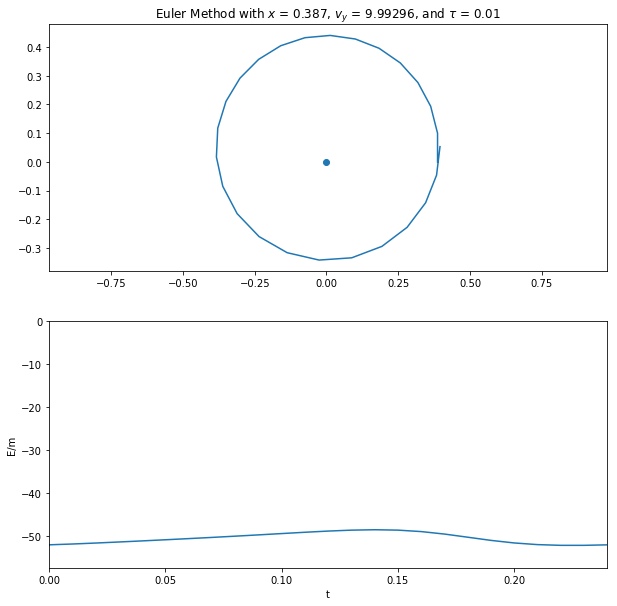

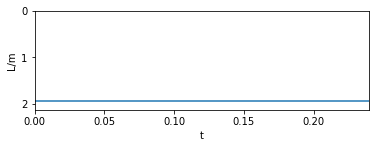

Wall time: 489 ms
For circular orbit of r = 0.723, and v = 7.389220000000001; Venus


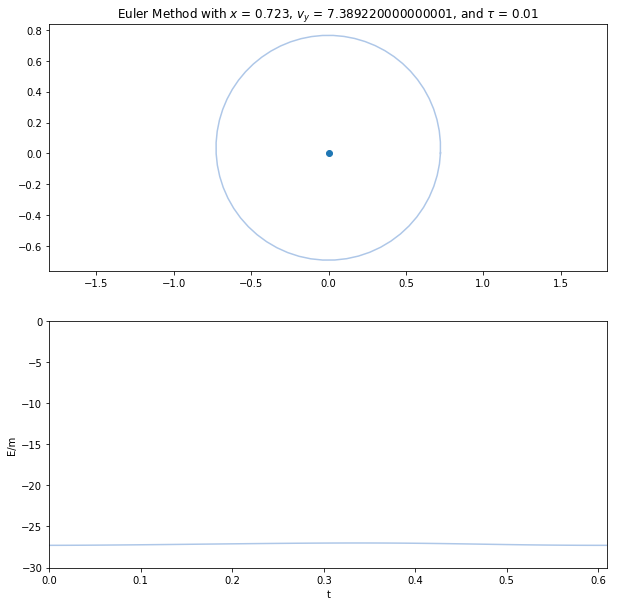

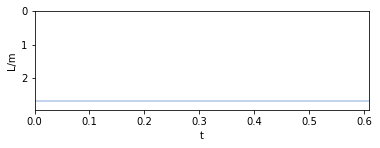

Wall time: 516 ms
For circular orbit of r = 1.0, and v = 6.28358; Earth


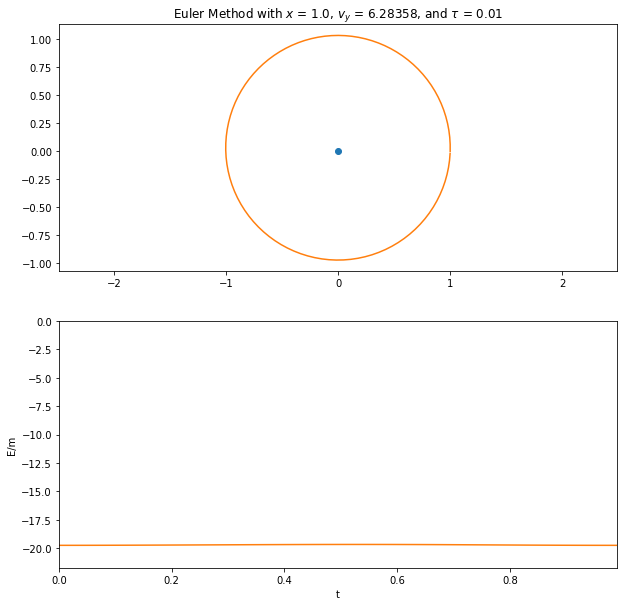

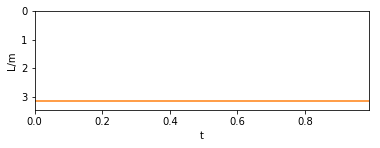

Wall time: 562 ms
For circular orbit of r = 1.523, and v = 5.07877; Mars


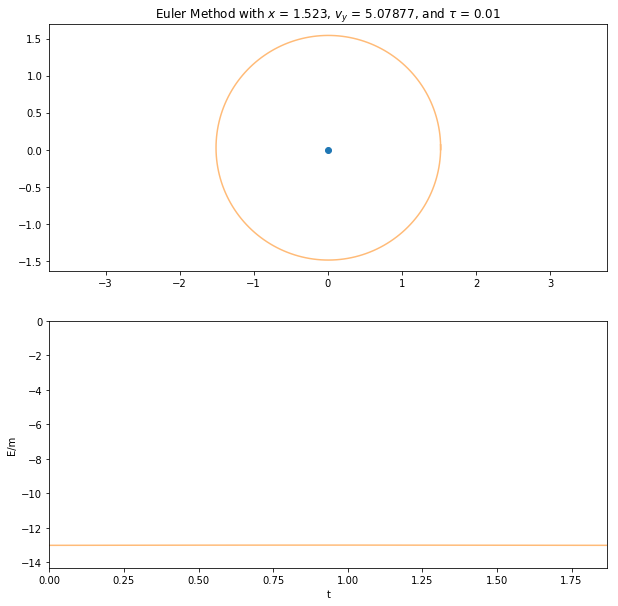

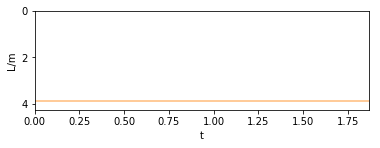

Wall time: 596 ms
For circular orbit of r = 5.203, and v = 2.75566; Jupiter


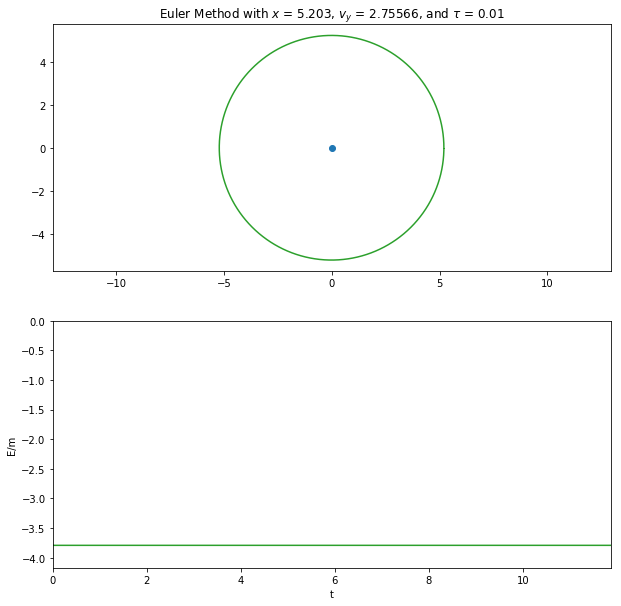

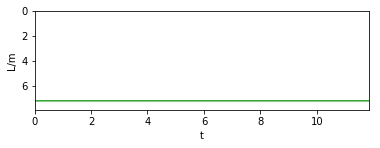

Wall time: 672 ms
For circular orbit of r = 9.537, and v = 2.04248; Saturn


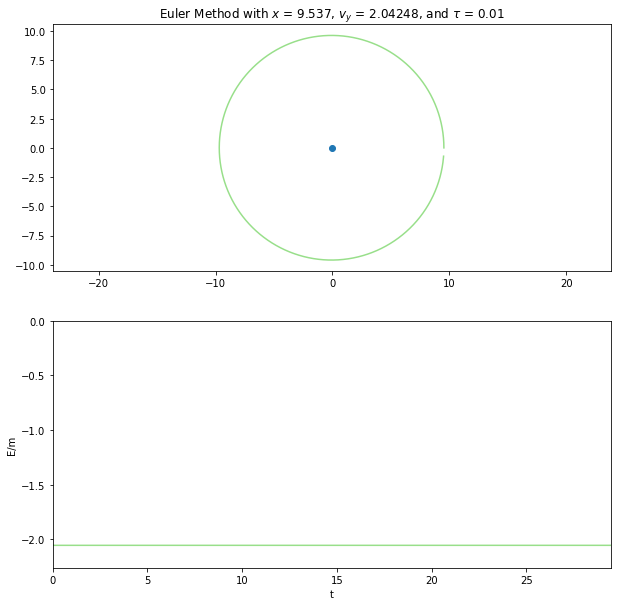

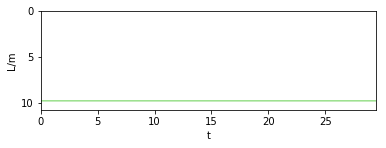

Wall time: 879 ms
For circular orbit of r = 19.191, and v = 1.4347999999999999; Uranus


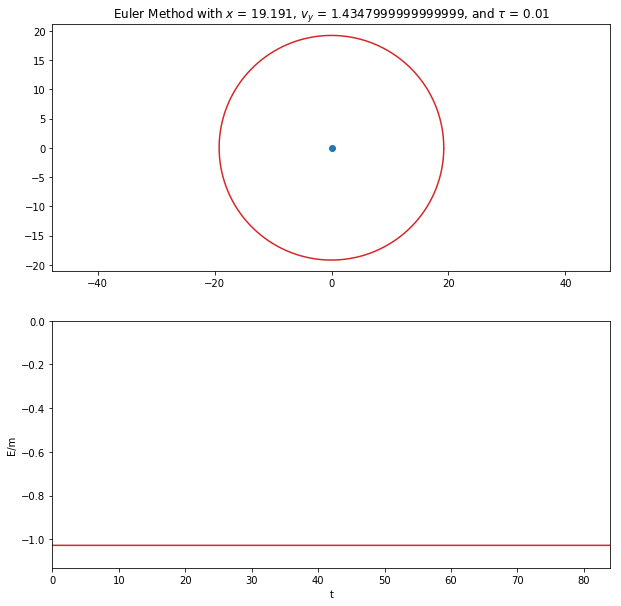

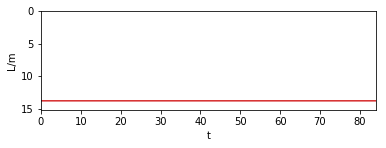

Wall time: 1.58 s
For circular orbit of r = 30.069, and v = 1.14573; Neptune


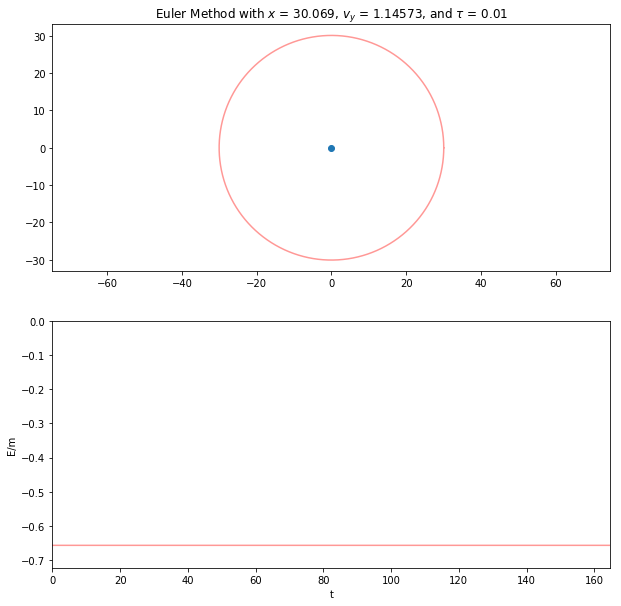

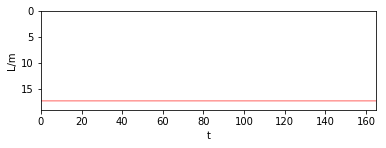

Wall time: 2.79 s


In [166]:
for x0, vy0, tf, color, name in zip(distance, velocity, periods, colormap, names):
    %time plot_trajectory(x0=x0, vy0=vy0, tf=tf, tau=0.01, method=euler, name=name, color=color)

For circular orbit of r = 0.387, and v = 9.99296; Mercury


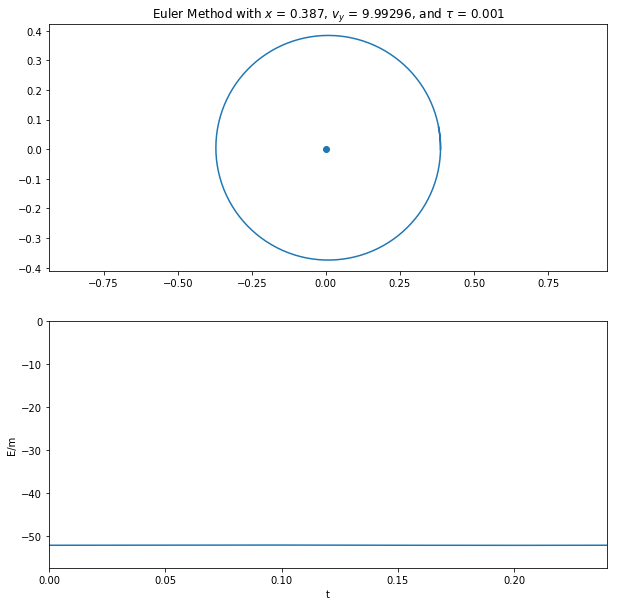

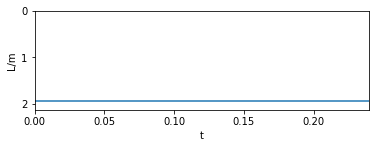

Wall time: 324 ms
For circular orbit of r = 0.723, and v = 7.389220000000001; Venus


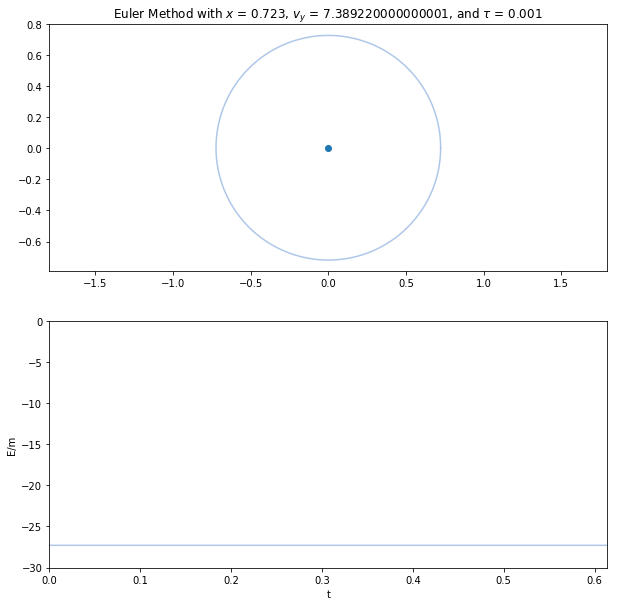

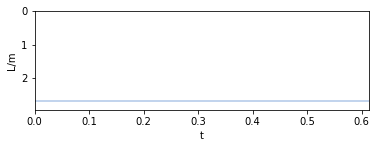

Wall time: 270 ms
For circular orbit of r = 1.0, and v = 6.28358; Earth


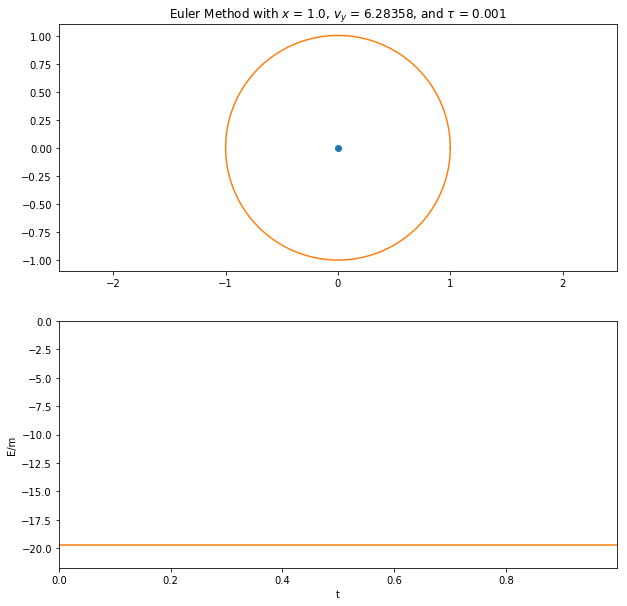

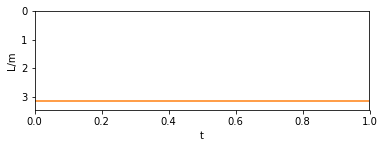

Wall time: 289 ms
For circular orbit of r = 1.523, and v = 5.07877; Mars


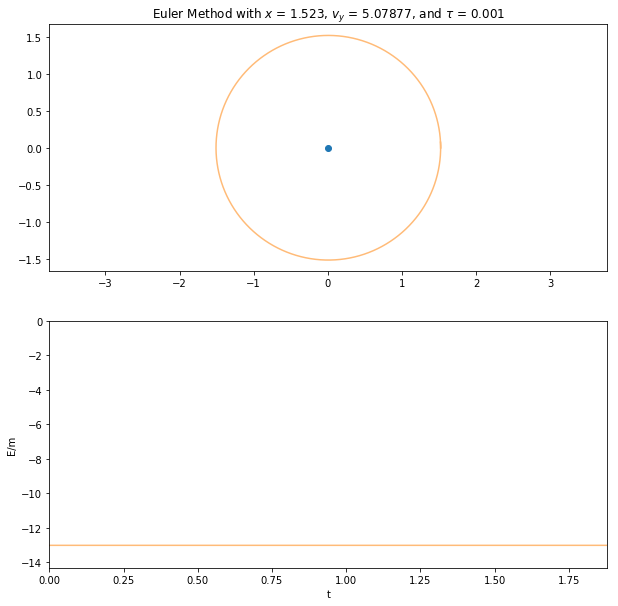

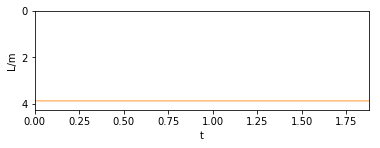

Wall time: 364 ms
For circular orbit of r = 5.203, and v = 2.75566; Jupiter


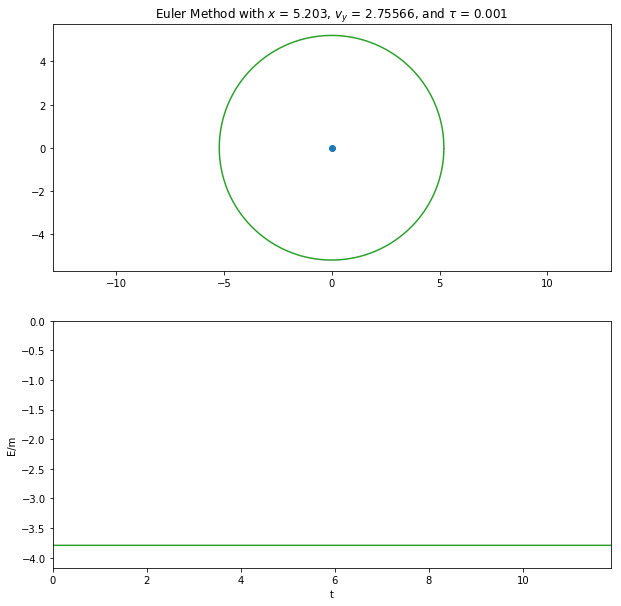

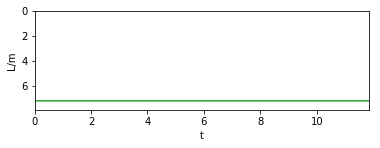

Wall time: 1.09 s
For circular orbit of r = 9.537, and v = 2.04248; Saturn


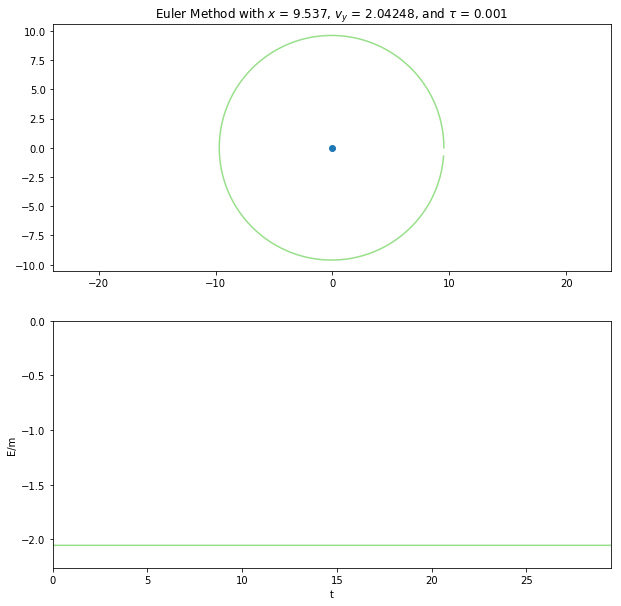

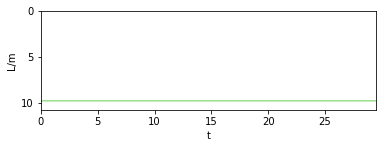

Wall time: 2.69 s
For circular orbit of r = 19.191, and v = 1.4347999999999999; Uranus


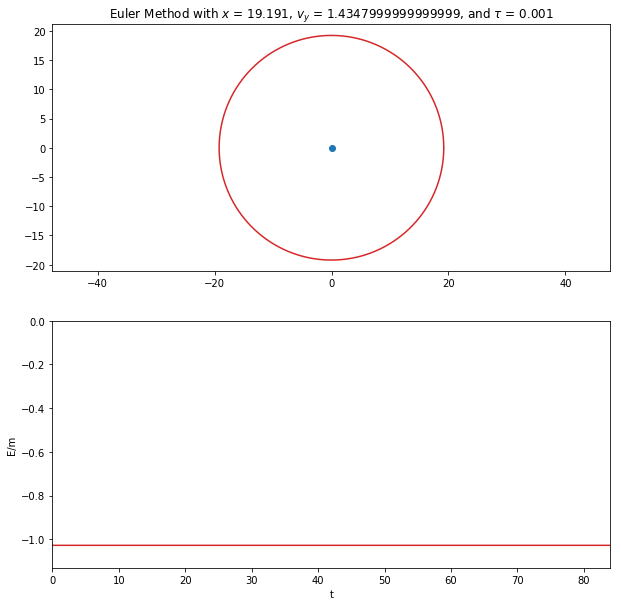

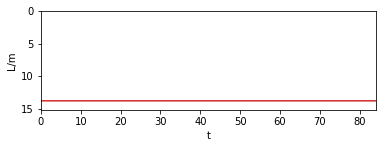

Wall time: 14 s
For circular orbit of r = 30.069, and v = 1.14573; Neptune


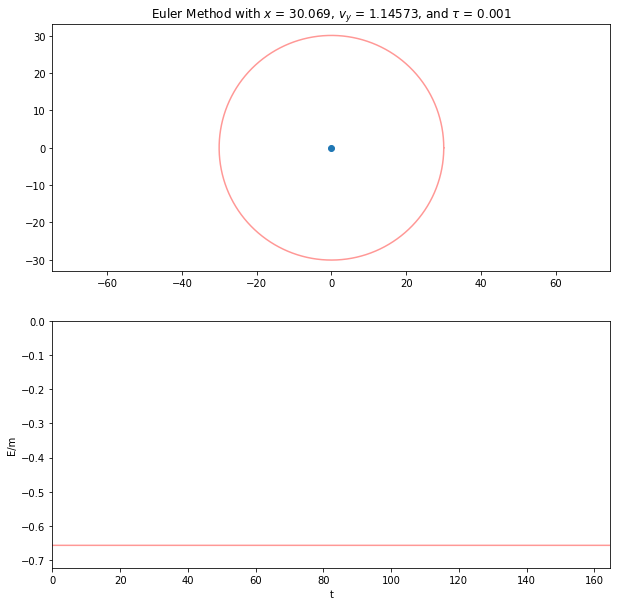

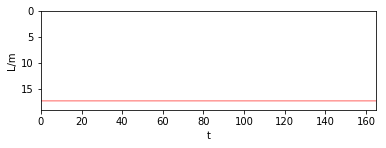

Wall time: 2min 28s


In [119]:
for x0, vy0, tf, color, name in zip(distance, velocity, periods, colormap, names):
    %time plot_trajectory(x0=x0, vy0=vy0, tf=tf, tau=0.001, method=euler, name=name, color=color)

## Euler & Runge-Kutta on elliptical orbits with different $\tau$-s

For circular orbit of r = 1, and v = 4.0; elliptical orbit


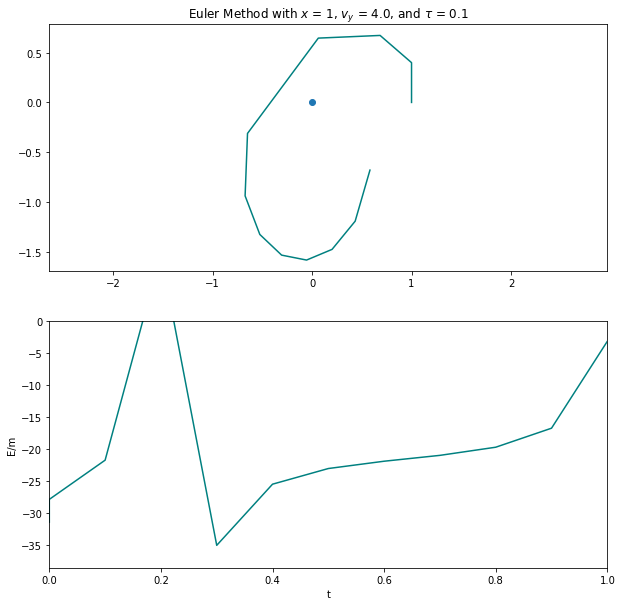

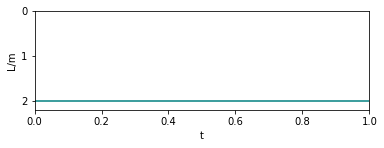

For circular orbit of r = 1, and v = 4.0; elliptical orbit


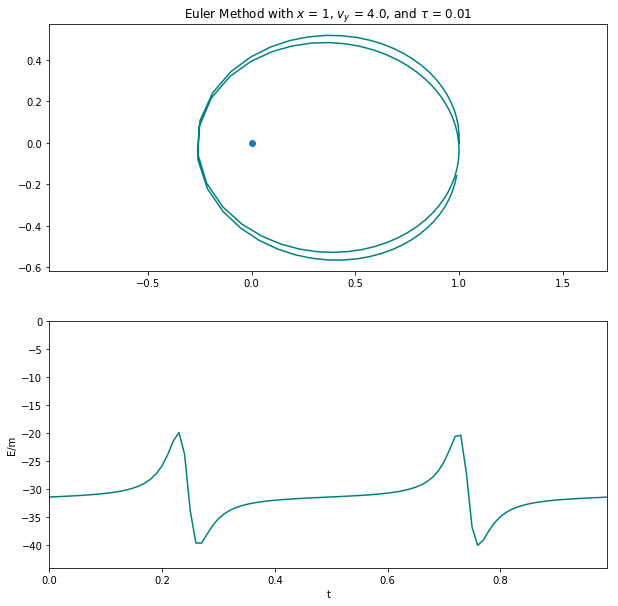

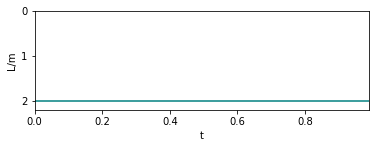

For circular orbit of r = 1, and v = 4.0; elliptical orbit


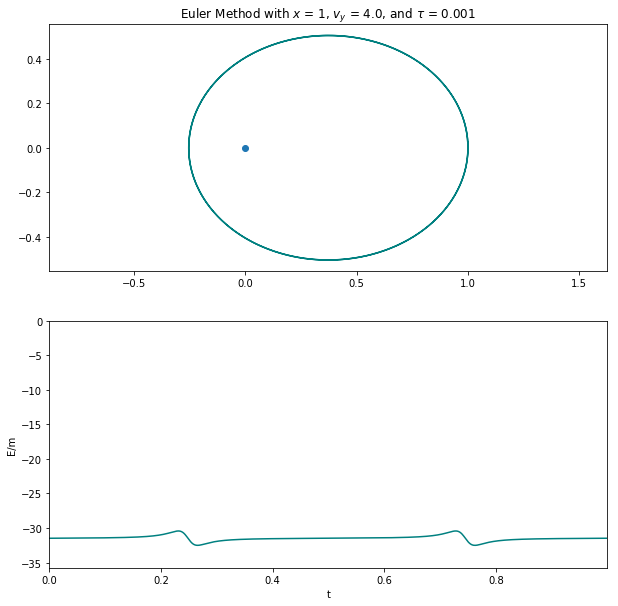

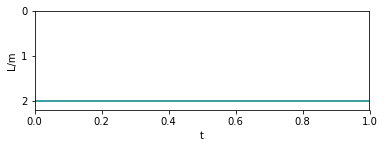

For circular orbit of r = 1, and v = 4.0; elliptical orbit


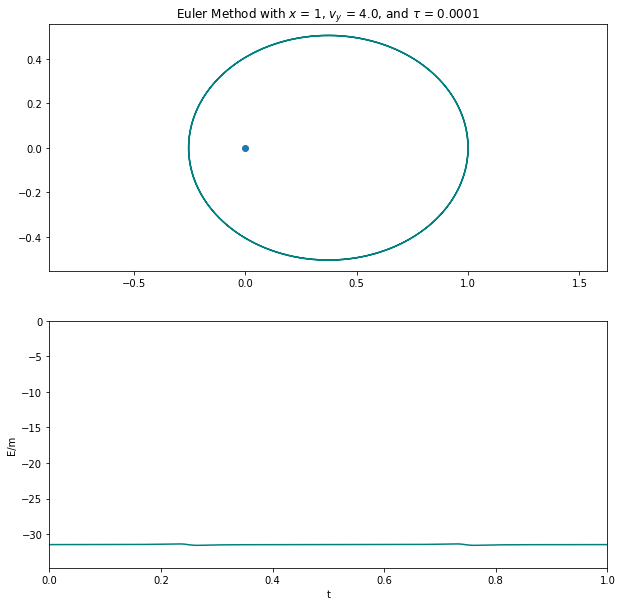

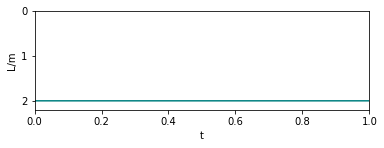

In [168]:
for tau in (0.1, 0.01, 0.001, 0.0001):
    plot_trajectory(x0=1, vy0=4.0, tf=1, tau=tau, method=euler, name="elliptical orbit", color="teal")

For circular orbit of r = 1, and v = 4.0; elliptical orbit
10


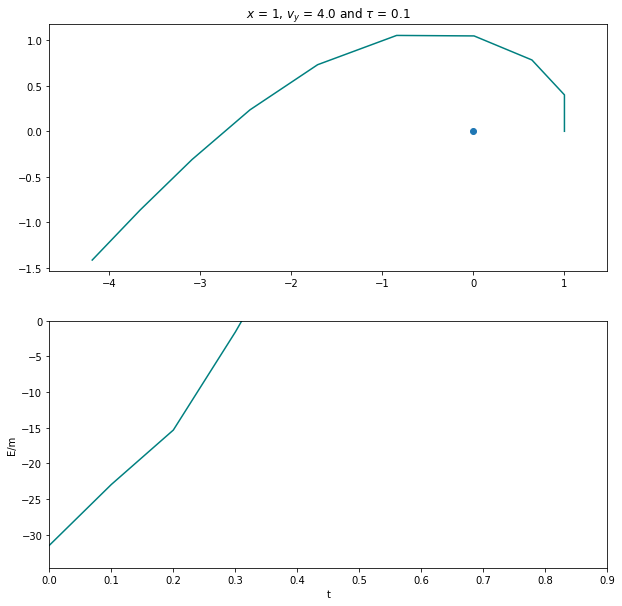

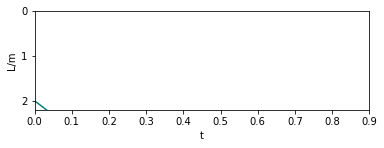

For circular orbit of r = 1, and v = 4.0; elliptical orbit
100


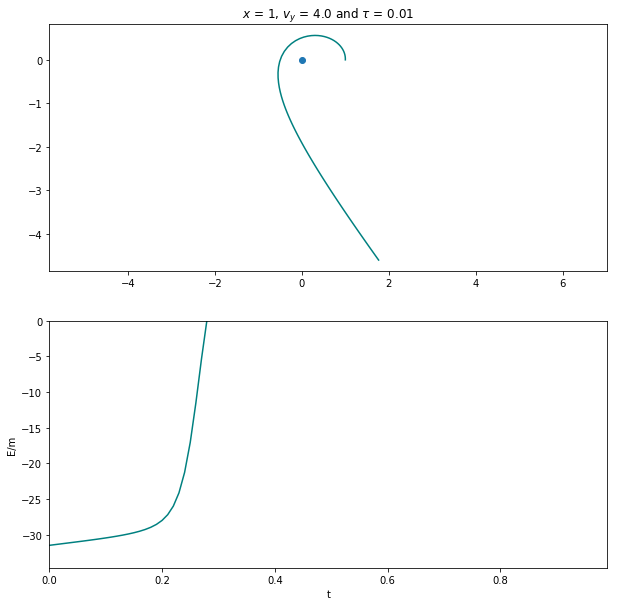

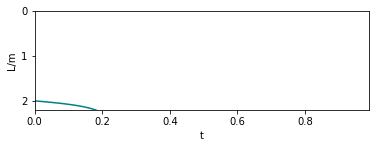

For circular orbit of r = 1, and v = 4.0; elliptical orbit
1000


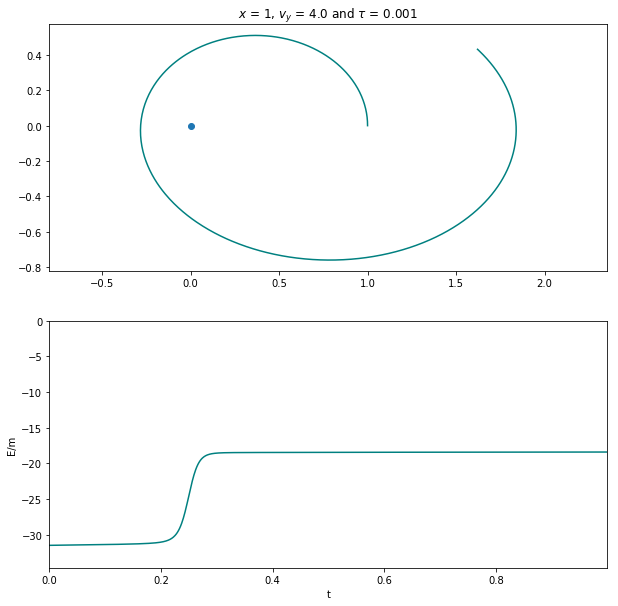

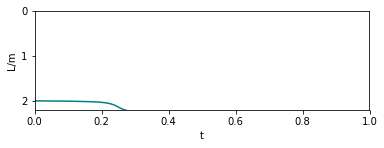

For circular orbit of r = 1, and v = 4.0; elliptical orbit
10000


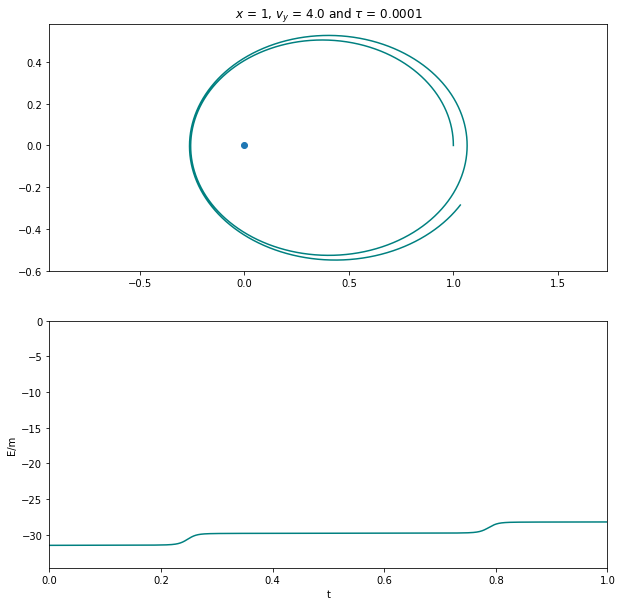

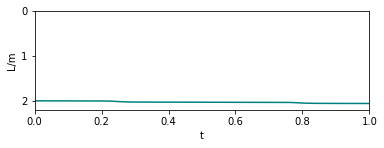

In [11]:
for tau in (0.1, 0.01, 0.001, 0.0001):
    plot_trajectory(x0=1, vy0=4.0, tf=1, tau=tau, method=rungekutta_2, name="elliptical orbit", color="teal")

## Runge-Kutta on circular orbits with  $\tau$=0.00001

For circular orbit of r = 0.387, and v = 9.99296; Mercury
24100


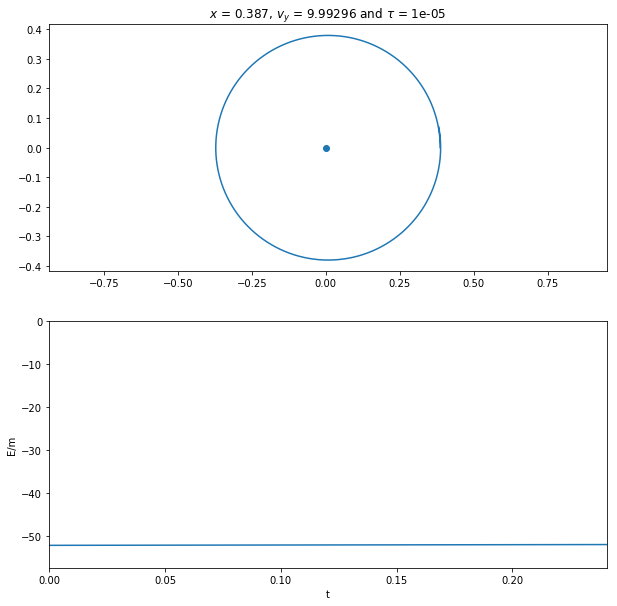

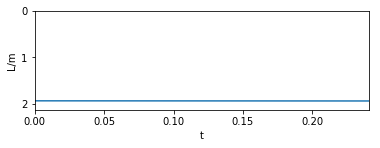

Wall time: 4.39 s
For circular orbit of r = 0.723, and v = 7.389220000000001; Venus
61500


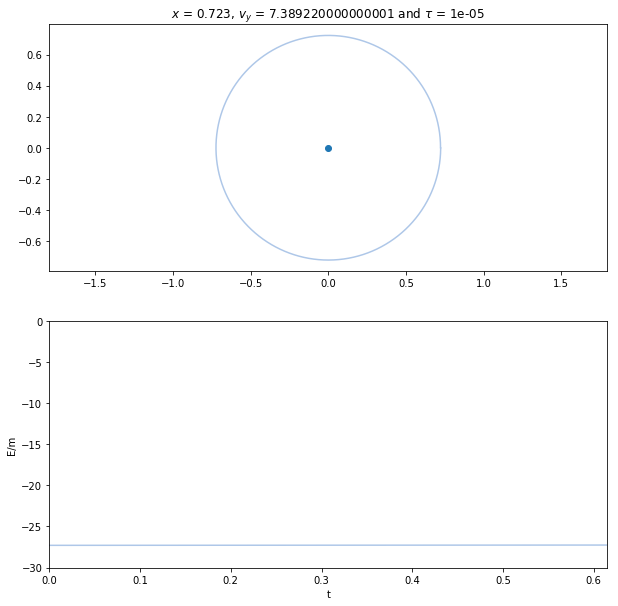

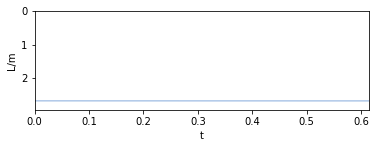

Wall time: 15.2 s
For circular orbit of r = 1.0, and v = 6.28358; Earth
100000


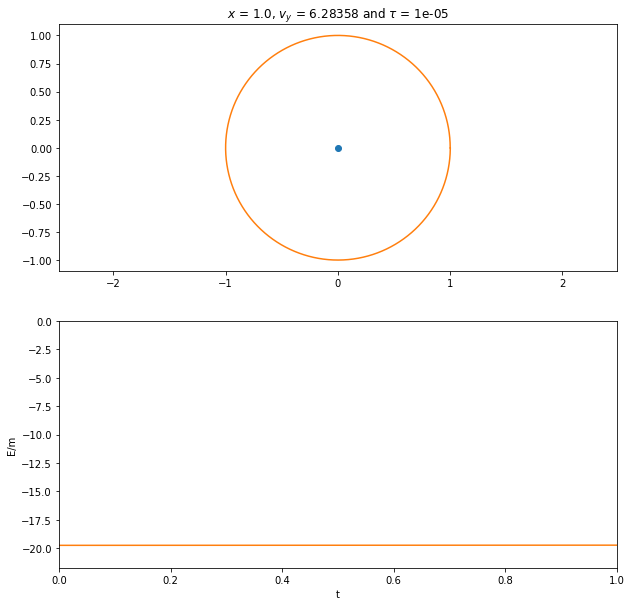

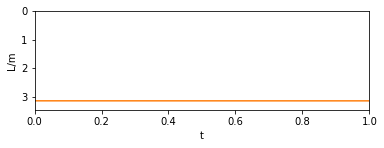

Wall time: 1min 47s
For circular orbit of r = 1.523, and v = 5.07877; Mars
188000


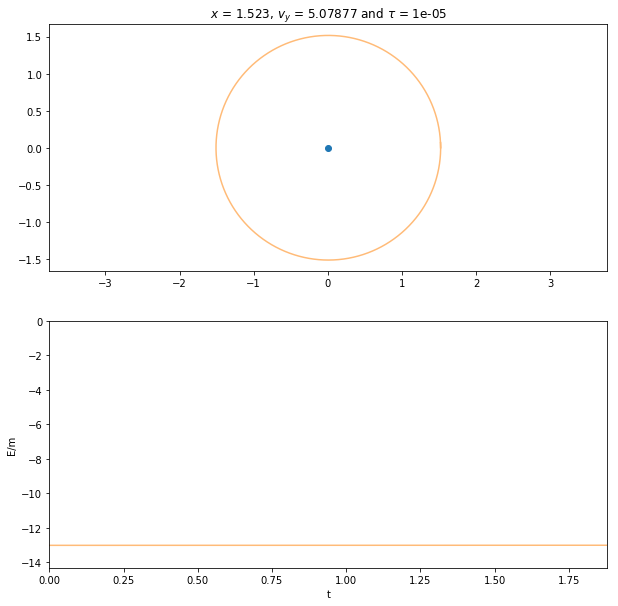

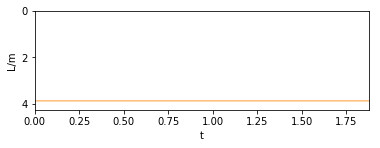

Wall time: 9min 18s


In [12]:
for x0, vy0, tf, color, name in zip(distance[:4], velocity[:4], periods[:4], colormap[:4], names[:4]):
    %time plot_trajectory(x0=x0, vy0=vy0, tf=tf, tau=0.00001, method=rungekutta_2, name=name, color=color)

### Sources

0. We must've learned it in the high school: https://en.wikipedia.org/wiki/Kepler's_laws_of_pl..
1. Tons of formulas: http://faculty.olin.edu/bstorey/Notes/DiffEq.pdf
2. Something that looks veeeeeryyy similar to our task: https://faculty1.coloradocollege.edu/~sburns/toolbox/..
3. GitHub Repo \w visualization: https://github.com/katiebreivik/Keplers_Laws
